# Data review

The data for this review can be found in the SNAP Google Drive in Projects > CASC Projects Data Mgmt > Reviews > Fitzgerald stream hydrology 2023. Copy this data to a place where it can be accessed by this notebook.

This notebook will walk through the USGS Data Review checklist, for each data file. 

First, set up the notebook with imports and paths:

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data_dir = Path("/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software")

# USGS Data Review checklist

## Are the data values reasonable?

Here we will check all of the `.csv` files for reasonable values.

In [2]:
# get all CSV files
fps = list(data_dir.glob("*.csv"))

### CSV: `2021 MT Creek Drift Data Final.csv`

In [3]:
fp = fps[0]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/2021 MT Creek Drift Data Final.csv


,Waterbody,Time,Date,Taxon,Stage,Insect,Origin,Higher.classification,Order,Family,Common.name,Length,Abundance,Biomass
0,Upper Montana Creek,14:11,2021-05-31,Oligochaeta,U,non-insect,Aquatic,Annelida: Oligochaeta,miscellaneous non-insect,x,segmented worms,3.0,40.976419,7.002820
1,Upper Montana Creek,14:11,2021-05-31,Oligochaeta,U,non-insect,Aquatic,Annelida: Oligochaeta,miscellaneous non-insect,x,segmented worms,5.0,59.188161,14.761886
2,Upper Montana Creek,14:11,2021-05-31,Oligochaeta,U,non-insect,Aquatic,Annelida: Oligochaeta,miscellaneous non-insect,x,segmented worms,8.0,50.082290,17.686422
3,Upper Montana Creek,14:11,2021-05-31,Nemata,U,non-insect,Aquatic,Nemata,miscellaneous non-insect,x,round worms,2.0,104.717515,13.257167
4,Upper Montana Creek,14:11,2021-05-31,Nemata,U,non-insect,Aquatic,Nemata,miscellaneous non-insect,x,round worms,5.0,13.658806,3.406589


Check the unique values for all of the non-numeric columns:

In [4]:
for column in df.dtypes[df.dtypes == object].index:
    print(df[column].unique())

['Upper Montana Creek']
['14:11' '10:18' '10:41' '10:28' '14:17' '9:25' '15:11' '14:22' '12:01'
 '10:29' '14:42' '12:47' '12:10' '15:01' '13:52' '11:02' '12:20' '9:43'
 '10:09' '10:33' '12:25' '12:09' '11:50' '12:52' '11:30' '12:37' '12:50'
 '10:55' '10:39' '13:55' '11:18' '9:48' '14:04' '10:53' '11:03' '14:44'
 '15:19' '11:28' '11:31' '10:05' '7:24' '11:19' '15:03' '10:56' '10:16'
 '10:01' '9:57' '11:05' '10:48' '10:08' '12:35' '10:03' '11:17' '13:40'
 '10:49' '9:24' '14:51' '13:29' '12:00' '14:19' '10:34' '11:22' '13:38'
 '11:20']
['2021-05-31' '2021-06-01' '2021-06-15' '2021-07-13' '2021-08-14'
 '2021-08-17' '2021-08-18' '2021-08-25' '2021-09-02' '2021-09-08'
 '2021-09-10' '2021-09-14' '2021-09-20' '2021-09-21' '2021-10-01'
 '2021-10-02' '2021-10-07' '2021-10-18' '2021-10-28' '2021-04-30'
 '2021-05-05' '2021-05-11' '2021-05-14' '2021-05-18' '2021-05-21'
 '2021-05-22' '2021-05-26' '2021-05-28' '2021-06-04' '2021-06-17'
 '2021-06-21' '2021-06-24' '2021-06-30' '2021-07-02' '2021-07-06'

Things look pretty good, don't see any obvious misspellings (i.e. two very similarly-spelled words, extra spaces etc..). 

Couple of sanity checks. 

All rows where `Insect` column is "insect" should have the `Higher.classification` column value of "Arthropoda: Insecta":

In [5]:
assert len(df.query("Insect == 'insect' & `Higher.classification` != 'Arthropoda: Insecta'")) == 0

The one thing that is throwing me off with this table is that the `Insect` column has "Vertebrata" as a possible choice in addition to the more intuitive  "insect" and "non-insect" options. And that "Vertebrata" is also an option used in the `Higher.classification` column. This isn't a show-stopper, but I will make a note in the review. 

Ignore - this is intentional as described in the metadata. Just check that Higher.classification matches for each:

In [6]:
assert np.all(df.query("Insect == 'Vertebrata' & `Higher.classification` == 'Vertebrata'") == df.query("Insect == 'Vertebrata'"))

Now onto the quantitative columns. Plot some histograms:

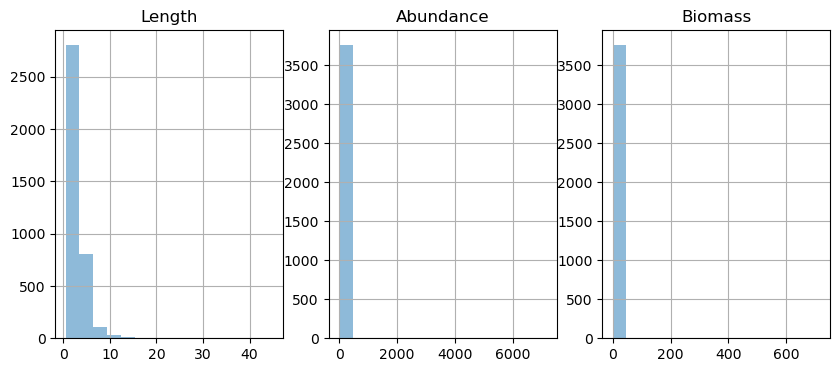

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for col, ax in zip(["Length", "Abundance", "Biomass"], axs.flatten()):
    df[col].hist(alpha=0.5, bins=15, ax=ax)
    ax.set_title(col)

Looks like some outlier potential for the `Abundance` and `Biomass` columns. Check these out:

Are there any other rows where Abundance is greater than even 1000?

In [8]:
df[df.Abundance > 1000]

,Waterbody,Time,Date,Taxon,Stage,Insect,Origin,Higher.classification,Order,Family,Common.name,Length,Abundance,Biomass
314,Upper Montana Creek,14:11,2021-07-13,Acari,U,non-insect,Aquatic,Arachnida: Acari,x,x,mites,0.5,1191.027579,11.205439
340,Upper Montana Creek,14:11,2021-07-13,Baetis,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Baetidae,mayflies,1.0,2273.779923,12.051034
341,Upper Montana Creek,14:11,2021-07-13,Baetis,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Baetidae,mayflies,1.5,5792.725042,98.496581
342,Upper Montana Creek,14:11,2021-07-13,Baetis,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Baetidae,mayflies,2.0,1407.578048,54.728002
370,Upper Montana Creek,14:11,2021-07-13,Chironomidae,L,insect,Aquatic,Arthropoda: Insecta,Diptera,Chironomidae,midges,1.5,7146.165472,37.168617


Well, there are other values that are pretty large, too.

Same thing for biomass:

In [9]:
print(f"Maximum of Biomass column: {df.Biomass.max()}")
df[df.Biomass == df.Biomass.max()]

Maximum of Biomass column: 715.7466982


,Waterbody,Time,Date,Taxon,Stage,Insect,Origin,Higher.classification,Order,Family,Common.name,Length,Abundance,Biomass
321,Upper Montana Creek,14:11,2021-07-13,Coleoptera,A,insect,Terrestrial,Arthropoda: Insecta,Coleoptera,x,beetles,9.0,54.137617,715.746698


In [10]:
df[df.Biomass > 100]

,Waterbody,Time,Date,Taxon,Stage,Insect,Origin,Higher.classification,Order,Family,Common.name,Length,Abundance,Biomass
320,Upper Montana Creek,14:11,2021-07-13,Coleoptera,A,insect,Terrestrial,Arthropoda: Insecta,Coleoptera,x,beetles,6.0,54.137617,245.402187
321,Upper Montana Creek,14:11,2021-07-13,Coleoptera,A,insect,Terrestrial,Arthropoda: Insecta,Coleoptera,x,beetles,9.0,54.137617,715.746698
328,Upper Montana Creek,14:11,2021-07-13,Heptageniidae,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Heptageniidae,mayflies,7.0,54.137617,124.257581
334,Upper Montana Creek,14:11,2021-07-13,Heptageniidae,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Heptageniidae,mayflies,6.0,108.275234,162.547926
343,Upper Montana Creek,14:11,2021-07-13,Baetis,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Baetidae,mayflies,3.0,920.339493,114.801493
344,Upper Montana Creek,14:11,2021-07-13,Baetis,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Baetidae,mayflies,4.0,812.064258,231.626765
345,Upper Montana Creek,14:11,2021-07-13,Baetis,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Baetidae,mayflies,5.0,595.513789,322.631267
355,Upper Montana Creek,14:11,2021-07-13,Coleoptera,A,insect,Terrestrial,Arthropoda: Insecta,Coleoptera,x,beetles,6.0,54.137617,245.402187
2939,Upper Montana Creek,11:17,2021-08-09,Salmonid eggs,E,Vertebrata,Aquatic,Vertebrata,x,x,x,5.0,4.710205,119.346891


Okay, there's quite a few high values in there.

Check out the months where these things were collected:

In [11]:
np.unique(pd.to_datetime(df.Date).dt.month, return_counts=True)

(array([ 4,  5,  6,  7,  8,  9, 10]),
 array([ 47, 504, 781, 447, 696, 626, 676]))

These values - April through October - make sense if we are talking about stream sampling in Alaska.

### CSV: `Age 0 BioE outputs.csv`

In [12]:
fp = fps[1]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Age 0 BioE outputs.csv


,Julian Day,fish length[y2013],fish length[y2014],fish length[y2015],fish length[y2016],fish length[y2017],fish length[y2018],fish length[y2019],fish length[y2020],fish length[y2021]
0,121,34.760266,34.760266,34.760266,34.760266,34.760266,34.760266,34.760266,34.760266,34.760266
1,122,34.660238,34.696837,34.685492,34.699956,34.724833,34.668270,34.662895,34.814863,34.730339
2,123,34.611027,34.647251,34.607097,34.647758,34.691872,34.630304,34.568867,34.870813,34.760343
3,124,34.611065,34.622492,34.522933,34.636160,34.657482,34.631147,34.492725,34.932709,34.776239
4,125,34.569224,34.593327,34.432963,34.648083,34.621194,34.564641,34.436255,34.982462,34.787726


Check the unique values for all of the non-numeric columns:

In [13]:
for column in df.dtypes[df.dtypes == object].index:
    print(df[column].unique())

Okay, no-non-numeric columns.

Check out the numeric ones.

**`Julian Day`**

This column should be values only between 1 and 366:

<AxesSubplot: >

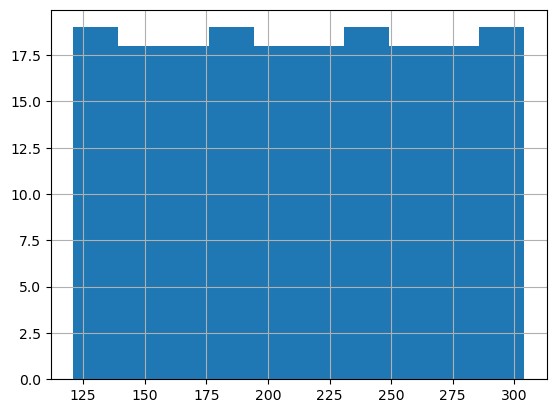

In [14]:
df["Julian Day"].hist()

Looks like this is true, and the histogram appears reasonable. 

The remaining columns are all different years of "fish length", so we will iterate and produce histograms of those:

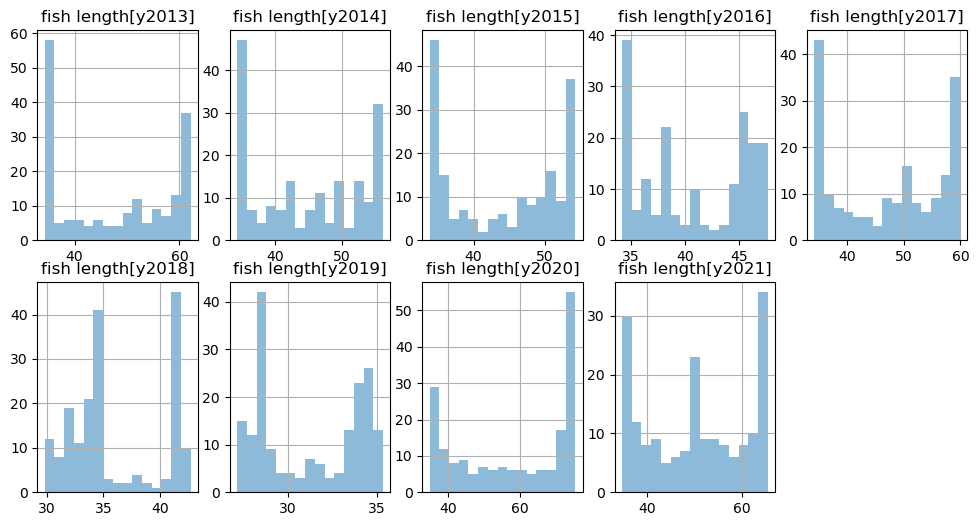

In [15]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for year, ax in zip(range(2013, 2022), axs.flatten()):
    df[f'fish length[y{year}]'].hist(alpha=0.5, bins=15, ax=ax)
    ax.set_title(f'fish length[y{year}]')

fig.delaxes(axs[1][-1])

These all look reasonable. 

### CSV: `Age 1 BioE outputs.csv`

In [16]:
fp = fps[2]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Age 1 BioE outputs.csv


,Julian Day,maximum length[y2013],maximum length[y2014],maximum length[y2015],maximum length[y2016],maximum length[y2017],maximum length[y2018],maximum length[y2019],maximum length[y2020],maximum length[y2021]
0,121,59.533418,59.533418,59.533418,59.533418,59.533418,59.533418,59.533418,59.533418,59.533418
1,122,59.410327,59.463933,59.447316,59.468502,59.504940,59.422091,59.414219,59.636825,59.513005
2,123,59.361889,59.414960,59.356136,59.415703,59.480334,59.390128,59.300129,59.742503,59.580645
3,124,59.385400,59.402149,59.256276,59.422176,59.453431,59.414828,59.212003,59.856732,59.627441
4,125,59.347301,59.382630,59.147620,59.462868,59.423489,59.340599,59.152419,59.952950,59.667543


Check the unique values for all of the non-numeric columns:

In [17]:
for column in df.dtypes[df.dtypes == object].index:
    print(df[column].unique())

Okay, no-non-numeric columns.

Check out the numeric ones.

**`Julian Day`**

This column should be values only between 1 and 366:

<AxesSubplot: >

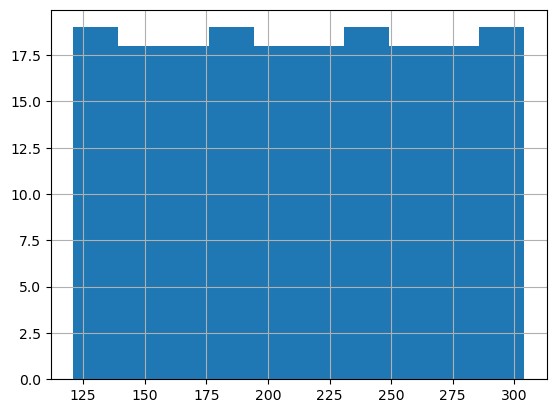

In [18]:
df["Julian Day"].hist()

Looks like this is true, and the histogram appears reasonable. 

The remaining columns are all different years of "maximum length", so we will iterate and produce histograms of those:

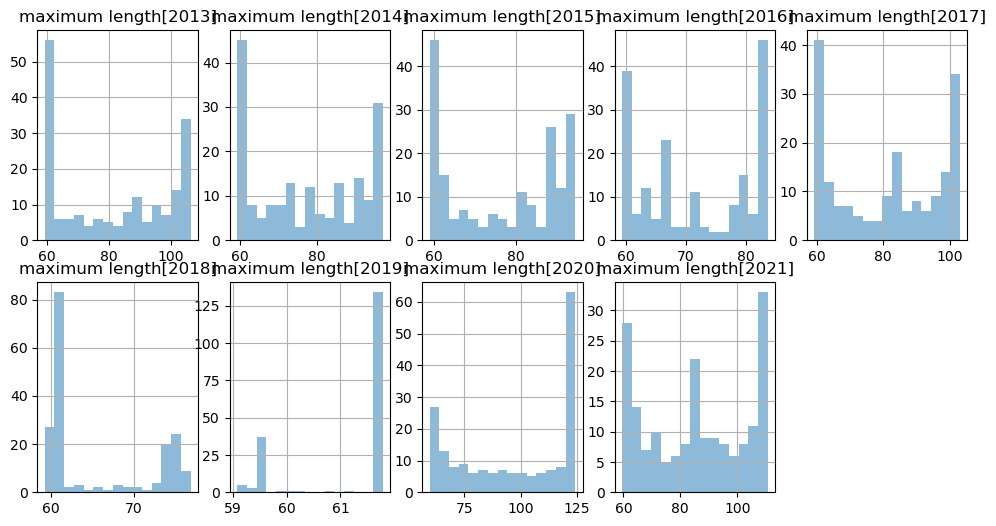

In [19]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for year, ax in zip(range(2013, 2022), axs.flatten()):
    df[f'maximum length[y{year}]'].hist(alpha=0.5, bins=15, ax=ax)
    ax.set_title(f'maximum length[{year}]')

fig.delaxes(axs[1][-1])

These all look reasonable. 

#### 🚩 Note - should these be the same column names as `Age 0 BioE Outputs.csv`? Judging by the filenames, you would guess them to be the same measurements.

### CSV: `Consumption_by_year.csv`

In [20]:
fp = fps[3]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Consumption_by_year.csv


,Unnamed: 0,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,121,0.001577,0.004502,0.003708,0.004872,0.006694,0.001962,0.001682,0.014566,0.004403
1,122,0.001605,0.004445,0.003380,0.004492,0.006694,0.002646,0.001986,0.012599,0.011574
2,123,0.011856,0.007084,0.003079,0.006485,0.006694,0.012384,0.002254,0.014734,0.011223
3,124,0.005047,0.008049,0.002385,0.011873,0.006694,0.004310,0.005500,0.013214,0.009527
4,125,0.008181,0.005996,0.002285,0.008497,0.006694,0.004159,0.004318,0.014378,0.012238


No nodata value defined in metadata, double check this:

In [21]:
assert np.all(df.dropna() == df)

#### 🚩 Note - unnamed index column in `Consumption_by_year.csv`

Since all of these columns are numeric, plot histograms for each:

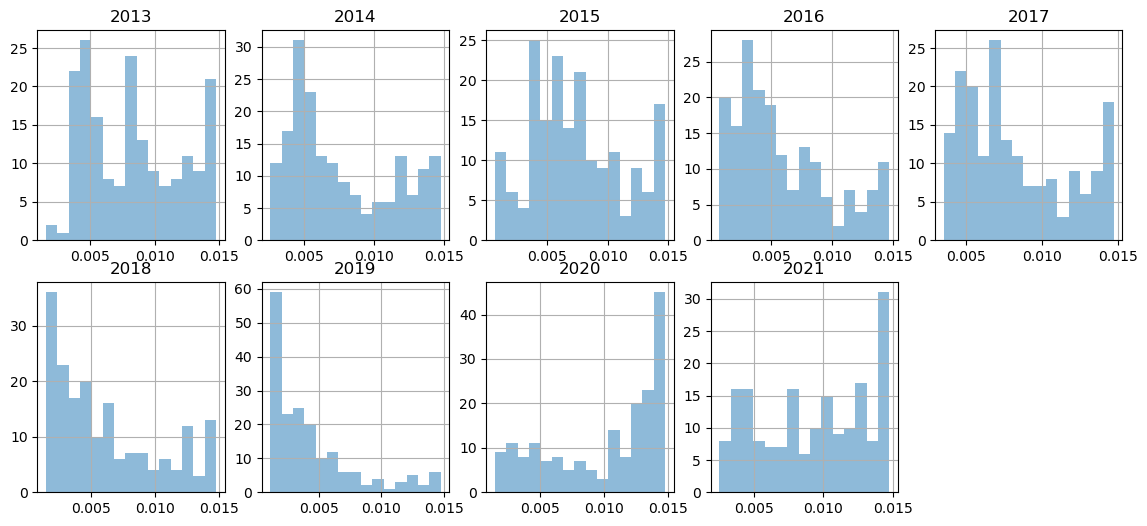

In [22]:
fig, axs = plt.subplots(2, 5, figsize=(14, 6))

for year, ax in zip(range(2013, 2022), axs.flatten()):
    df[f'{year}'].hist(alpha=0.5, bins=15, ax=ax)
    ax.set_title(year)

fig.delaxes(axs[1][-1])

These all seem reasonable.

### CSV: Consumption_Model_Inputs.csv

In [23]:
fp = fps[4]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Consumption_Model_Inputs.csv


,Date,Day of year,Temperature,pred (mg AFDM),se.fit,flow,fitted (mg AFDM),consumption (g AFDM),Modeled pcmax,lower,upper,Unnamed: 11,Unnamed: 12,Average Temp (C),6.47,Unnamed: 15
0,5/1/2021,121,1.784094,1.482382,0.235482,1.980962,4.403423,0.004403,0.053824,2.775516,6.986138,0.014739,NaN,Average Mass (g Wetmass),4.756480,78.06mm
1,5/2/2021,122,2.042104,2.448771,0.212713,1.283815,11.574114,0.011574,0.141473,7.628216,17.561132,0.180156,NaN,Modeled Cmax,0.086000,NaN
2,5/3/2021,123,2.116031,2.417958,0.155416,0.765018,11.222914,0.011223,0.137180,8.275860,15.219422,NaN,NaN,Max Consumption (g wetmass),0.409057,NaN
3,5/4/2021,124,1.688771,2.254107,0.135248,0.700677,9.526782,0.009527,0.116448,7.308375,12.418572,NaN,NaN,Max Consumption (g AFDM),0.081811,NaN
4,5/5/2021,125,1.993208,2.504542,0.214660,1.245740,12.237958,0.012238,0.149587,8.035009,18.639382,NaN,NaN,Modeled Stomach Fullness,0.017200,NaN


#### 🚩 Note - three unnamed columns in this file, appearing to be mostly null values. Also, weirdness in "Average Temp (C)" column, potentially related to unnamed columns issue.

Explore the non-numeric columns:

In [24]:
for column in df.dtypes[df.dtypes == object].index:
    print(df[column].unique())

['5/1/2021' '5/2/2021' '5/3/2021' '5/4/2021' '5/5/2021' '5/6/2021'
 '5/7/2021' '5/8/2021' '5/9/2021' '5/10/2021' '5/11/2021' '5/12/2021'
 '5/13/2021' '5/14/2021' '5/15/2021' '5/16/2021' '5/17/2021' '5/18/2021'
 '5/19/2021' '5/20/2021' '5/21/2021' '5/22/2021' '5/23/2021' '5/24/2021'
 '5/25/2021' '5/26/2021' '5/27/2021' '5/28/2021' '5/29/2021' '5/30/2021'
 '5/31/2021' '6/1/2021' '6/2/2021' '6/3/2021' '6/4/2021' '6/5/2021'
 '6/6/2021' '6/7/2021' '6/8/2021' '6/9/2021' '6/10/2021' '6/11/2021'
 '6/12/2021' '6/13/2021' '6/14/2021' '6/15/2021' '6/16/2021' '6/17/2021'
 '6/18/2021' '6/19/2021' '6/20/2021' '6/21/2021' '6/22/2021' '6/23/2021'
 '6/24/2021' '6/25/2021' '6/26/2021' '6/27/2021' '6/28/2021' '6/29/2021'
 '6/30/2021' '7/1/2021' '7/2/2021' '7/3/2021' '7/4/2021' '7/5/2021'
 '7/6/2021' '7/7/2021' '7/8/2021' '7/9/2021' '7/10/2021' '7/11/2021'
 '7/12/2021' '7/13/2021' '7/14/2021' '7/15/2021' '7/16/2021' '7/17/2021'
 '7/18/2021' '7/19/2021' '7/20/2021' '7/21/2021' '7/22/2021' '7/23/2021'
 '7/2

It appears this table might be a bit botched? e.g. the "Average Temp (C) column" has values that are kind of similar to some of the actual columns, and those values don't show up in much else of the column.

### CSV: McGinnis 2021 15 min (1) (1).csv

In [25]:
fp = fps[5]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Montana abv. McGinnis 2021 15 min (1) (1).csv


,Date-Time,Discharge
0,4/27/2021 14:30,0.996839
1,4/27/2021 14:45,0.809409
2,4/27/2021 15:00,0.815721
3,4/27/2021 15:15,1.018252
4,4/27/2021 15:30,1.054518


Try parsing `Date-Time` column to a datetime object:

In [26]:
df["Date-Time"] = pd.to_datetime(df["Date-Time"])

That it worked without error is a good check that the values are valid. Now check the distribution:

<AxesSubplot: >

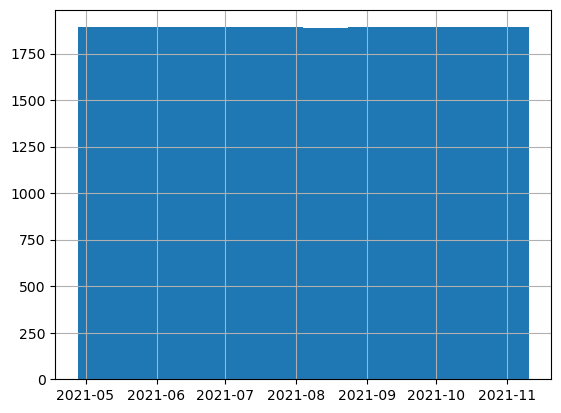

In [27]:
df["Date-Time"].hist()

Good. Now check the this for the `Discharge` column:

<AxesSubplot: >

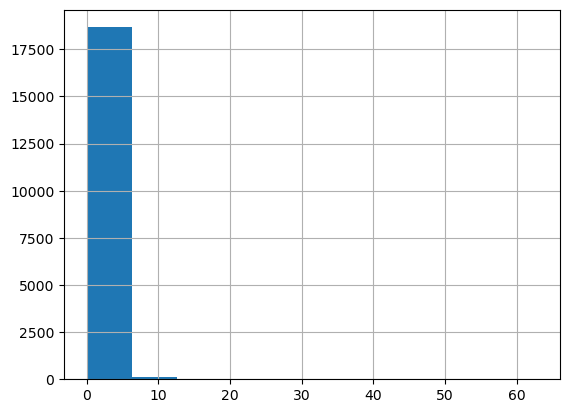

In [28]:
df.Discharge.hist()

Seems OK, but potential outlier alert, so check to see if we have more than one observation above like, 20:

In [29]:
df[df.Discharge > 20] 

,Date-Time,Discharge
10332,2021-08-13 05:45:00,22.080373
10342,2021-08-13 08:15:00,20.308974
10344,2021-08-13 08:45:00,25.792583
10348,2021-08-13 09:45:00,25.494741
10350,2021-08-13 10:15:00,22.721373
10351,2021-08-13 10:30:00,30.953698
10352,2021-08-13 10:45:00,27.158554
10353,2021-08-13 11:00:00,20.395447
10354,2021-08-13 11:15:00,20.265820
18688,2021-11-08 07:30:00,33.107819


Okay these seem OK.

### CSV: MT Creek Pressure Trans Temp Data (1).csv

In [30]:
fp = fps[6]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/MT Creek Pressure Trans Temp Data (1).csv


,Date Time,Temperature
0,4/27/2021 14:30,2.071
1,4/27/2021 14:45,2.058
2,4/27/2021 15:00,2.064
3,4/27/2021 15:15,2.097
4,4/27/2021 15:30,2.079


Try parsing `Date Time` column to a datetime object:

#### 🚩 Note - try to be consistent with column names between files, e.g. stick with either `Date-Time` or `Date Time`.

In [31]:
df["Date Time"] = pd.to_datetime(df["Date Time"])

That it worked without error is a good check that the values are valid. Now check the distribution:

<AxesSubplot: >

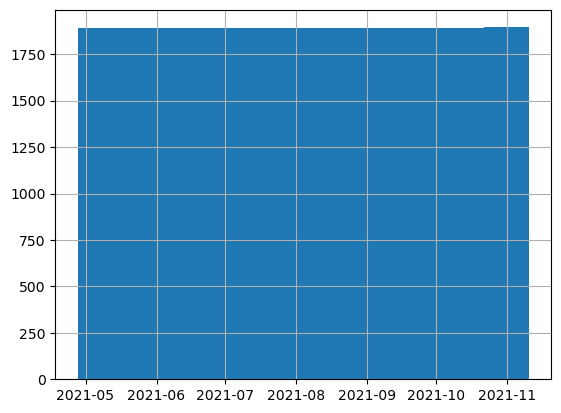

In [32]:
df["Date Time"].hist()

Good. Now check the this for the `Discharge` column:

<AxesSubplot: >

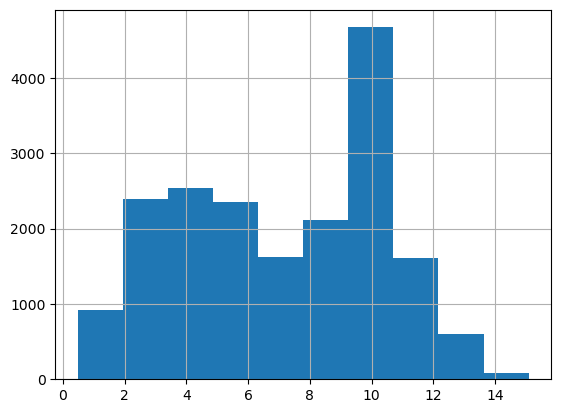

In [33]:
df.Temperature.hist()

Checks out.

In [34]:
fp

PosixPath('/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/MT Creek Pressure Trans Temp Data (1).csv')

In [35]:
df[df.Temperature.isnull()]

,Date Time,Temperature
860,2021-05-06 13:30:00,NaN
10649,2021-08-16 12:45:00,NaN
10650,2021-08-16 13:00:00,NaN
10651,2021-08-16 13:15:00,NaN



#### 🚩 Note - are the datetimes the same on these last two CSVs? Could consider combining them, if they are from the same instrument?

### CSV: Raw Coho Diet Data Final (1).csv

In [36]:
fp = fps[7]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Raw Coho Diet Data Final (1).csv


,Waterbody,Habitat,Fish.species,Sample.code,Date,Taxon,Stage,Insect,Origin,Higher.classification,Order,Family,Common.name,Length,Abundance,Biomass
0,Montana Creek,Mainstem,Coho,#5,2021-05-05,Chironomidae,L,insect,Aquatic,Arthropoda: Insecta,Diptera,Chironomidae,midges,5.0,1,0.121472
1,Montana Creek,Mainstem/Side Channel,Coho,#16,2021-05-11,Chironomidae,A,insect,Aquatic,Arthropoda: Insecta,Diptera,Chironomidae,midges,2.0,3,0.266553
2,Montana Creek,Mainstem/Side Channel,Coho,#16,2021-05-11,Rhyacophila,L,insect,Aquatic,Arthropoda: Insecta,Trichoptera,Rhyacophilidae,caddisflies,4.0,1,0.308137
3,Montana Creek,Mainstem/Side Channel,Coho,#16,2021-05-11,Baetidae,L,insect,Aquatic,Arthropoda: Insecta,Ephemeroptera,Baetidae,mayflies,3.0,1,0.124738
4,Montana Creek,Mainstem/Side Channel,Coho,#5,2021-05-11,Tipuloidea,L,insect,Aquatic,Arthropoda: Insecta,Diptera,Tipulidae,crane flies,5.0,1,0.216938


In [37]:
for column in df.dtypes[df.dtypes == object].index:
    print(df[column].unique())

['Montana Creek']
['Mainstem' 'Mainstem/Side Channel' 'Seep']
['Coho']
['#5' '#16' '#9' '#3' '#11' '#12' '#15' '#14' '#1' '#18' '#13' '#17' '#4'
 '#6' '#7' '#2' '#21' '#24' '#25' '#27' '#28' '#32' '#34' '#37' '#38'
 '#41' '#29' '#26' '#10' '#22' '#23' '#20' '#8' '#33' '#31' '#30' '#35'
 '#36' '#39' '#77' '#78' '#84' '#85' '#86' '#87' '#88' '#89' '#90' '#91'
 '#58' '#57' '#59' '#60' '#61' '#69' '#70' '#72' '#73' '#19' '#49' '#50'
 '#51' '#40' '#42' '#56' '#52' '#43' '#44' '#45' '#48' '#53' '#71' '#64'
 '#62' '#54' '#55' '#63' '#79' '#83' '#94' '#102' '#111' '#46' '#65' '#80'
 '#82' '#92' '#93' '#95' '#117' '#66' '#76' '#149' '#150' '#151' '#47']
[' 2021-05-05' ' 2021-05-11' ' 2021-05-14' ' 2021-05-18' ' 2021-05-21'
 ' 2021-05-26' ' 2021-05-28' ' 2021-05-31' ' 2021-06-01' ' 2021-06-04'
 ' 2021-06-09' ' 2021-06-10' ' 2021-06-15' ' 2021-06-17' ' 2021-06-21'
 ' 2021-06-24' ' 2021-06-30' ' 2021-07-02' ' 2021-07-06' ' 2021-07-13'
 ' 2021-07-15' ' 2021-07-20' ' 2021-07-29' ' 2021-08-03' ' 2021

Nothin unexpected here. Check out histograms of numeric columns:

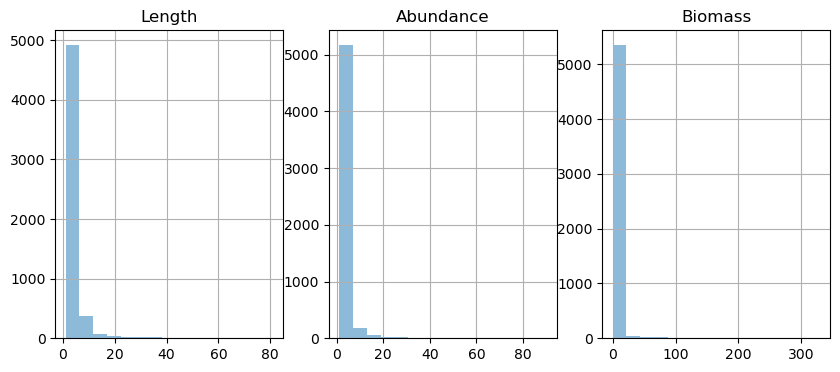

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for col, ax in zip(["Length", "Abundance", "Biomass"], axs.flatten()):
    df[col].hist(alpha=0.5, bins=15, ax=ax)
    ax.set_title(col)

These look pretty good. You can see there is a distribution for each of these, with at least the leftmost 4 bins visible in each. 

### CSV: Raw Dolly Diet Data Final (2).csv

In [39]:
fp = fps[8]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Raw Dolly Diet Data Final (2).csv


,Waterbody,Species,Date,Sample.code,Taxon,Stage,Insect,Origin,Higher.classification,Order,Family,Common.name,Length,Abundance,Biomass
0,Montana Creek,Dolly Varden,2021-05-05,8,Crassiclitellata,U,non-insect,Terrestrial,Annelida: Oligochaeta,miscellaneous non-insect,Lumbriculidae,segmented worms,13.0,1,0.505810
1,Montana Creek,Dolly Varden,2021-05-05,8,Crassiclitellata,U,non-insect,Terrestrial,Annelida: Oligochaeta,miscellaneous non-insect,Lumbriculidae,segmented worms,25.0,1,0.820625
2,Montana Creek,Dolly Varden,2021-05-05,8,Hydropsychidae,L,insect,Aquatic,Arthropoda: Insecta,Trichoptera,Hydropsychidae,caddisflies,14.0,1,10.383134
3,Montana Creek,Dolly Varden,2021-05-05,6,Simuliidae,L,insect,Aquatic,Arthropoda: Insecta,Diptera,Simuliidae,black flies,5.0,1,0.254465
4,Montana Creek,Dolly Varden,2021-05-05,6,Simuliidae,L,insect,Aquatic,Arthropoda: Insecta,Diptera,Simuliidae,black flies,6.0,1,0.440599


In [40]:
for column in df.dtypes[df.dtypes == object].index:
    print(df[column].unique())

['Montana Creek']
['Dolly Varden']
[' 2021-05-05' ' 2021-05-11' ' 2021-05-14' ' 2021-05-18' ' 2021-05-21'
 ' 2021-05-26' ' 2021-05-28' ' 2021-05-31' ' 2021-06-01' ' 2021-06-04'
 ' 2021-06-09' ' 2021-06-15' ' 2021-06-17' ' 2021-06-21' ' 2021-06-24'
 ' 2021-06-30' ' 2021-07-02' ' 2021-07-06' ' 2021-07-13' ' 2021-07-15'
 ' 2021-07-20' ' 2021-07-29' ' 2021-08-03' ' 2021-08-04' ' 2021-08-09'
 ' 2021-08-12' ' 2021-08-14' ' 2021-08-18' ' 2021-08-25' ' 2021-08-28'
 ' 2021-09-02' ' 2021-09-03' ' 2021-09-10' ' 2021-09-14' ' 2021-09-21'
 ' 2021-09-23' ' 2021-09-24' ' 2021-10-01' ' 2021-10-02']
['Crassiclitellata' 'Hydropsychidae' 'Simuliidae' 'Copepoda' 'Baetidae'
 'Chironomidae' 'Rhyacophila' 'Heptageniidae' 'Ameletus' 'Chloroperlidae'
 'Tipuloidea' 'Lepidoptera' 'Empididae' 'Limnephilidae' 'Nemouridae'
 'Neoleptophlebia/Paraleptophlebia' 'Salmonid eggs' 'Oligochaeta' 'Pisces'
 'Micrasema' 'Capniidae' 'Coleoptera' 'Glossosomatidae' 'Syrphidae'
 'Drunella' 'Dolichopodidae' 'Juvenile Salmonid' 'My

#### 🚩 Note - consistency / interoperability check - is there any habitat information available for the Dolly Varden?
#### 🚩 Note - consistency / interoperability check - why is Pisces included here in the `Insect` column?


Nothin unexpected here. Check out histograms of numeric columns:

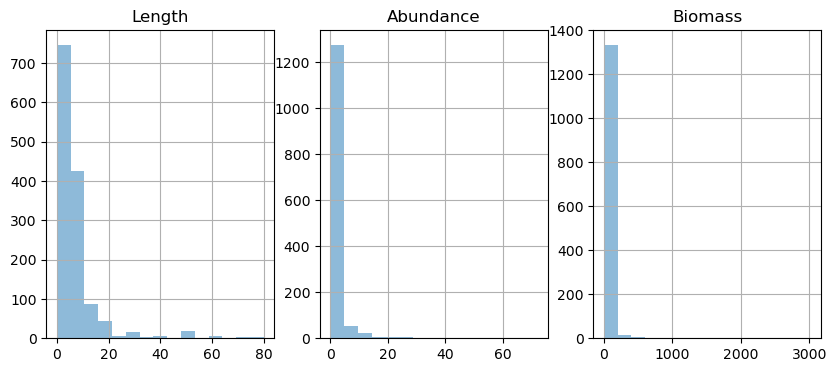

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for col, ax in zip(["Length", "Abundance", "Biomass"], axs.flatten()):
    df[col].hist(alpha=0.5, bins=15, ax=ax)
    ax.set_title(col)

These all look reasonable.

### CSV: Salmon spawning density estimates (1).csv

In [42]:
fp = fps[9]
print(fp)
df = pd.read_csv(fp)
df

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Salmon spawning density estimates (1).csv


,Date,Observers,Spawners,Carcasses,Reach Length,Width 1,Width 2,Width 3,Width 4,Width 5,Average width,Wetted area,Est. Spawner Density
0,2021-07-29,"Kevin, Ezra",64,0,200,5.60,7.25,5.32,7.75,4.30,6.044,1208.8,0.052945
1,2021-08-12,"Kevin, Ezra",201,22,200,5.25,7.00,5.10,7.30,4.11,5.752,1150.4,0.174722
2,2021-09-02,"Kevin, Lucy",17,114,200,8.60,7.40,5.40,8.20,5.50,7.020,1404.0,0.012108
3,2021-09-14,"Kevin, Matt",2,63,200,8.00,7.30,5.40,7.80,5.00,6.700,1340.0,0.001493


This table is small enough to assess from this view - looks OK.

### CSV: Upper_MT_FishData_Final_Analysis (1).csv

In [43]:
fp = fps[10]
print(fp)
df = pd.read_csv(fp)
df.head()

/atlas_scratch/kmredilla/casc_data_mgmt/FitzgeraldCH1_Data_Metadata_Software/Upper_MT_FishData_Final_Analysis (1).csv


,Fish_ID_comp,Date,Fish_ID_day,Trap,Habitat,PIT_tag,Species,FL,TL,Weight,Diet,Fin Clip,Pink_Salmon_pres_abs
0,1,5/5/2021,1,NaN,Main_Side,93DDEE5,Cutthroat,NaN,125.0,16.9,N,N,0
1,2,5/5/2021,2,NaN,Main_Side,NaN,Coho,NaN,57.0,1.8,N,N,0
2,3,5/5/2021,3,NaN,Main_Side,93DDF90,Cutthroat,NaN,99.0,5.7,N,N,0
3,4,5/5/2021,4,NaN,Main_Side,93DDF73,Cutthroat,NaN,112.0,11.9,N,N,0
4,5,5/5/2021,5,NaN,Main_Side,93DDF84,Coho,NaN,89.0,6.8,Y,N,0


#### 🚩 Note - does Fish_ID_comp mean anything across this full dataset? 

In [44]:
for column in df.dtypes[df.dtypes == object].index:
    print(df[column].unique())

['5/5/2021' '5/11/2021' '5/14/2021' '5/18/2021' '5/21/2021' '5/26/2021'
 '5/28/2021' '5/31/2021' '6/1/2021' '6/4/2021' '6/9/2021' '6/10/2021'
 '6/15/2021' '6/17/2021' '6/21/2021' '6/24/2021' '6/30/2021' '7/2/2021'
 '7/6/2021' '7/13/2021' '7/15/2021' '7/20/2021' '7/29/2021' '8/3/2021'
 '8/4/2021' '8/9/2021' '8/12/2021' '8/14/2021' '8/18/2021' '8/25/2021'
 '8/28/2021' '9/2/2021' '9/3/2021' '9/10/2021' '9/14/2021' '9/21/2021'
 '9/23/2021' '9/24/2021' '10/1/2021' '10/2/2021' '10/7/2021' '10/12/2021'
 '10/18/2021' '10/28/2021']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95

#### 🚩 misspellings in `Species` column: "Cuthroat/Steelhead", "Cojho", "Cuthroat"

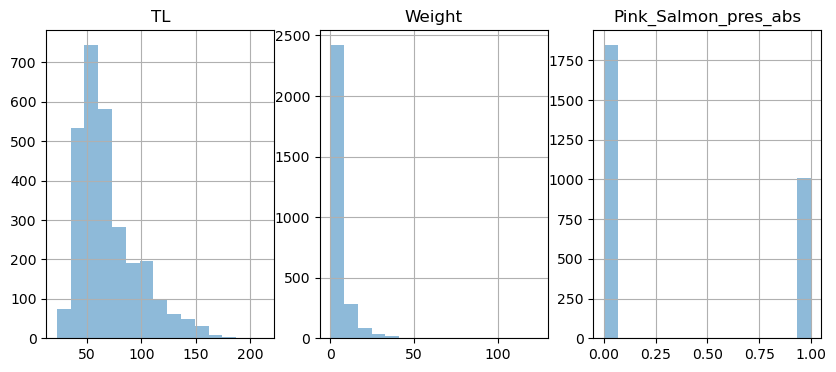

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for col, ax in zip(["TL", "Weight", "Pink_Salmon_pres_abs"], axs.flatten()):
    df[col].hist(alpha=0.5, bins=15, ax=ax)
    ax.set_title(col)

All look reasonable.

#### 🚩 opportunity for consistency: just use empty values instead of "x", parsed by most CSV readers as null values. 

done.